<a href="https://colab.research.google.com/github/crux007/crux007/blob/main/using_k_means_for_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from textblob import TextBlob

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Royal mail Data ratings.csv')

In [6]:
df['reviewBody'] = df['reviewBody'].str.lower()

In [8]:
# Remove stop words and apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['reviewBody'])

In [9]:
# Apply K-means clustering
num_clusters = 2  # Number of clusters (positive and negative)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [10]:
# Predict clusters
predictions = kmeans.predict(X)

In [11]:
# Calculate polarity and subjectivity scores
df['Polarity'] = df['reviewBody'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['reviewBody'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [13]:
# Add cluster labels to the DataFrame
df['Cluster'] = predictions

In [14]:
# Map cluster labels to sentiment labels
sentiment_map = {0: 'Negative', 1: 'Positive'}
df['Sentiment'] = df['Cluster'].map(sentiment_map)

In [17]:
# Save DataFrame to CSV
df.to_csv('/content/drive/MyDrive/Royal mail Data ratings_with_sentiment111.csv', index=False)

In [16]:
# Print the results
print(df[['reviewBody', 'Polarity', 'Subjectivity', 'Cluster', 'Sentiment']])

                                             reviewBody  Polarity  \
0     the lady i spoke to seem to talk over me.alway...  0.300000   
1     easy website to navigate but holding back pric... -0.075000   
2     nice website and great variety, but payment no...  0.148810   
3     online redirection form failed first time, app... -0.125000   
4     the site is not very custom frendly,you have t... -0.250000   
...                                                 ...       ...   
4605  i have a registered account but still spent ha... -0.088889   
4606  it's not difficul to purchase from royal mail ...  0.296333   
4607  it seems that with every order there is an iss... -0.027083   
4608  items are easy to purchase and delivery is pro...  0.069444   
4609  no next day delivery for stamp collections - c...  0.291667   

      Subjectivity  Cluster Sentiment  
0         0.600000        1  Positive  
1         0.525000        1  Positive  
2         0.507143        1  Positive  
3         0

In [18]:
df_pred = pd.read_csv('/content/drive/MyDrive/Royal mail Data ratings_with_sentiment.csv')

In [19]:
df_pred.head(30)

,author_name,Date Published,reviewBody,Annotations,Polarity,Subjectivity,Cluster,Sentiment
0,LINDSAY HARGREAVES,8/8/2018,the lady i spoke to seem to talk over me.alway...,0,0.300000,0.600000,1,Positive
1,Terence King,2/5/2022,easy website to navigate but holding back pric...,0,-0.075000,0.525000,1,Positive
2,Nick Sargent,3/2/2019,"nice website and great variety, but payment no...",0,0.148810,0.507143,1,Positive
3,Mrs Caira,9/9/2019,"online redirection form failed first time, app...",0,-0.125000,0.316667,1,Positive
4,Alan Carter,8/8/2018,"the site is not very custom frendly,you have t...",0,-0.250000,0.450000,1,Positive
5,Joanna Rankin,2/5/2022,i redirected my post back in march for myself ...,0,0.019536,0.233944,1,Positive
6,Neil,3/2/2019,"reasonable but could be more user friendly, su...",1,0.315000,0.520000,1,Positive
7,Christine Sifleet,9/9/2019,very very expensive,NaN,-0.650000,0.910000,0,Negative
8,David P,8/8/2018,wasn't aware that charges were now applicable ...,NaN,0.250000,0.250000,1,Positive
9,Unhappy Customer,2/5/2022,don’t see how you should register just to get ...,0,0.203125,0.498333,1,Positive


To use logistic regression

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from textblob import TextBlob

In [21]:
df = pd.read_csv('/content/drive/MyDrive/Royal mail Data ratings_with_sentiment.csv')

In [23]:
# Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X, df['Sentiment'])

LogisticRegression()

In [24]:
# Perform text classification and calculate polarity and subjectivity scores
predictions = logreg.predict(X)
df['Prediction'] = predictions
df['Polarity'] = df['reviewBody'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['reviewBody'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [25]:
print(classification_report(df['Sentiment'], predictions))

              precision    recall  f1-score   support

    Negative       1.00      0.77      0.87       199
    Positive       0.99      1.00      0.99      4411

    accuracy                           0.99      4610
   macro avg       0.99      0.88      0.93      4610
weighted avg       0.99      0.99      0.99      4610



Use xgboost for the same dataset

In [30]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [27]:
df = pd.read_csv('/content/drive/MyDrive/Royal mail Data ratings_with_sentiment.csv')

In [31]:
# Encode the sentiment labels to numeric
label_encoder = LabelEncoder()
df['Sentiment_encoded'] = label_encoder.fit_transform(df['Sentiment'])

In [32]:
# Train an XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X, df['Sentiment_encoded'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [33]:
# Perform text classification and calculate polarity and subjectivity scores
predictions = xgb_model.predict(X)
df['Prediction_encoded'] = predictions
df['Polarity'] = df['reviewBody'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['reviewBody'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [34]:
# Decode the predicted labels back to original sentiment labels
df['Prediction'] = label_encoder.inverse_transform(df['Prediction_encoded'])

In [35]:
print(classification_report(df['Sentiment'], df['Prediction']))

              precision    recall  f1-score   support

    Negative       0.99      1.00      1.00       199
    Positive       1.00      1.00      1.00      4411

    accuracy                           1.00      4610
   macro avg       1.00      1.00      1.00      4610
weighted avg       1.00      1.00      1.00      4610



using svm

In [36]:
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

In [37]:
df = pd.read_csv('/content/drive/MyDrive/Royal mail Data ratings_with_sentiment.csv')

In [38]:
# Encode the sentiment labels to numeric
label_encoder = LabelEncoder()
df['Sentiment_encoded'] = label_encoder.fit_transform(df['Sentiment'])

In [39]:
# Train an SVM model
svm_model = svm.SVC()
svm_model.fit(X, df['Sentiment_encoded'])

SVC()

In [40]:
# Perform text classification and calculate polarity and subjectivity scores
predictions = svm_model.predict(X)
df['Prediction_encoded'] = predictions
df['Polarity'] = df['reviewBody'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['reviewBody'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [41]:
# Decode the predicted labels back to original sentiment labels
df['Prediction'] = label_encoder.inverse_transform(df['Prediction_encoded'])

In [42]:
print(classification_report(df['Sentiment'], df['Prediction']))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       199
    Positive       1.00      1.00      1.00      4411

    accuracy                           1.00      4610
   macro avg       1.00      1.00      1.00      4610
weighted avg       1.00      1.00      1.00      4610



In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [44]:
positive_reviews = df[df['Sentiment'] == 'Positive']['reviewBody']

In [45]:
# Concatenate positive reviews into a single string
positive_text = ' '.join(positive_reviews)

In [46]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

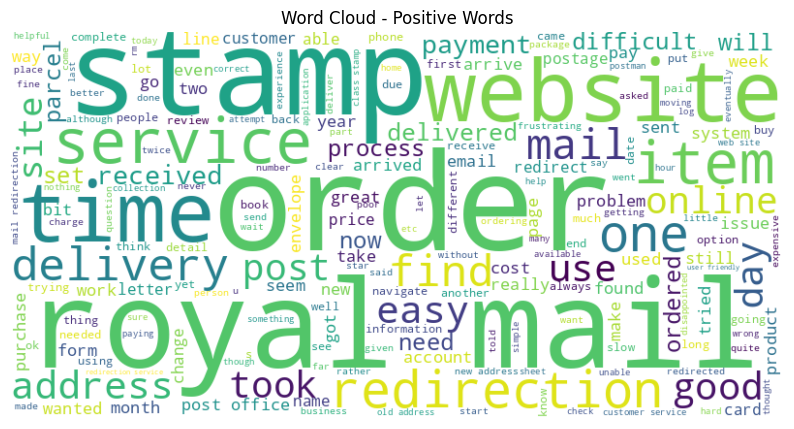

In [47]:
# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Words')
plt.show()

In [48]:
# Filter negative reviews
negative_reviews = df[df['Sentiment'] == 'Negative']['reviewBody']

In [49]:
# Concatenate negative reviews into a single string
negative_text = ' '.join(negative_reviews)

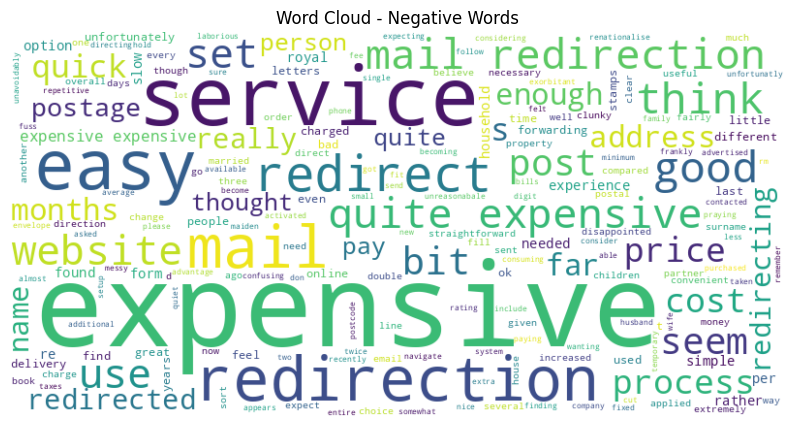

In [50]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Words')
plt.show()